# Práctica 9. Análisis de asociación

El aprendizaje con reglas de asociación lo vemos aplicado principalmente en los sistemas de recomendación, como en el caso donde se nos muestra que las personas que compraron este producto, también compraron este otro .. o quienes vieron tal película también recomiendan estas otras, etc.

Para ello, el algoritmo a priori es uno de los más utilizados en este tema y permite encontrar de forma eficiente conjuntos de items frecuentes, los cuales sirven de base para generar reglas de asociación entre los items.

La forma de generar las reglas de asociación consta de dos pasos:

    • Generación de combinaciones frecuentes: cuyo objetivo es encontrar aquellos conjuntos que sean frecuentes en la base  de datos. Para determinar la frecuencia se establece un umbral.
    • Generación de reglas: A partir de los conjuntos frecuentes se crean las reglas en base al ordenamiento de un índice   que establece los grupos de items o productos frecuentes.

In [1]:
# importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori
import seaborn as sns
%matplotlib inline

In [4]:
# importamos el dataset
df = pd.read_csv('ventas_tienda.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


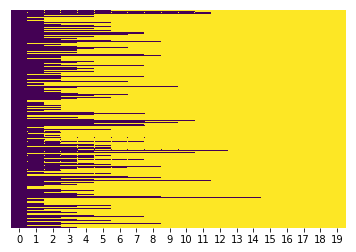

In [5]:
# Primero comprobamos si hay valores NaN en nuestro dataset
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Nuestro dataset contiene datos faltantes(NaN), estos son los de color amarillo.

In [7]:
registros = []
for i in range(0,7501):
    registros.append([str(df.values[i,j]) for j in range(0,20)]) 

#### Procesamiento de los datos

La biblioteca Apriori que vamos a utilizar requiere que nuestro conjunto de datos tenga la forma de una lista de listas, donde todo el conjunto de datos es una lista grande y cada transacción en el conjunto de datos es una lista interna dentro de la lista grande externa.

In [9]:
# mostramos los indices
registros[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

Supongamos que queremos reglas solo para aquellos artículos que se compran al menos 10 veces al día, o 7 x 10 = 70 veces en una semana, ya que nuestro conjunto de datos es por un período de una semana. El soporte para esos artículos se puede calcular como 70/6106 = 0.0115. La confianza mínima para las reglas es 0.2. Del mismo modo, especificamos el valor de elevación como 3 y finalmente min_lengthes = 5, ya que queremos al menos 5 productos en nuestras reglas.

In [10]:
#apriori
association_rules = apriori(registros, min_support=0.0115,min_confidence=0.2,min_lift=3,min_length=2)
association_results = list(association_rules)

In [12]:
for index in association_results:
    print(index)

RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)])
RelationRecord(items=frozenset({'nan', 'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'nan', 'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285), OrderedStatistic(items_base=frozenset({'nan', 'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)])


In [13]:
association_results = pd.DataFrame(association_results)
association_results

,items,support,ordered_statistics
0,"(herb & pepper, ground beef)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."
1,"(nan, herb & pepper, ground beef)",0.015998,"[((herb & pepper), (nan, ground beef), 0.32345..."
